# Analyze to optimize inventory 

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
retail_store_inventory = pd.read_csv('./Dataset_NCKH/retail_store_inventory.csv')

In [164]:
retail_store_inventory

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [165]:
retail_store_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [166]:
retail_store_inventory["Category"].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [167]:
retail_store_inventory_clothing = retail_store_inventory[retail_store_inventory["Category"] == "Clothing"]

In [168]:
retail_store_inventory_clothing

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
11,2022-01-01,S001,P0012,Clothing,West,66,24,70,26.75,58.25,20,Snowy,0,62.21,Spring
13,2022-01-01,S001,P0014,Clothing,West,193,12,187,6.80,78.11,0,Sunny,0,80.06,Spring
14,2022-01-01,S001,P0015,Clothing,North,379,369,154,363.46,92.99,15,Snowy,0,95.80,Winter
17,2022-01-01,S001,P0018,Clothing,South,241,151,47,147.27,19.57,5,Cloudy,0,23.13,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73068,2024-01-01,S004,P0009,Clothing,East,115,47,139,66.94,48.65,10,Snowy,0,49.74,Winter
73071,2024-01-01,S004,P0012,Clothing,East,85,63,36,63.69,11.65,5,Rainy,0,7.14,Summer
73075,2024-01-01,S004,P0016,Clothing,West,314,182,148,193.14,19.12,0,Rainy,0,20.11,Winter
73078,2024-01-01,S004,P0019,Clothing,East,65,44,166,43.07,61.04,0,Snowy,0,60.99,Summer


In [169]:
retail_store_inventory_clothing.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,14626.000000,14626.000000,14626.000000,14626.000000,14626.000000,14626.000000,14626.000000,14626.000000
mean,274.597771,136.685765,110.411938,141.750079,54.886602,10.005812,0.495761,54.920652
std,129.873512,108.421855,52.041693,108.718373,26.154154,7.095560,0.499999,26.308811
min,50.000000,0.000000,20.000000,-9.790000,10.000000,0.000000,0.000000,5.310000
25%,163.000000,49.000000,66.000000,54.800000,32.170000,5.000000,0.000000,32.362500
50%,273.000000,108.000000,110.000000,113.255000,54.550000,10.000000,0.000000,54.545000
75%,387.000000,203.000000,155.000000,208.717500,77.717500,15.000000,1.000000,77.537500
max,500.000000,489.000000,200.000000,506.370000,99.990000,20.000000,1.000000,104.810000


# Check missing data

In [170]:
retail_store_inventory_clothing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 7 to 73097
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                14626 non-null  object 
 1   Store ID            14626 non-null  object 
 2   Product ID          14626 non-null  object 
 3   Category            14626 non-null  object 
 4   Region              14626 non-null  object 
 5   Inventory Level     14626 non-null  int64  
 6   Units Sold          14626 non-null  int64  
 7   Units Ordered       14626 non-null  int64  
 8   Demand Forecast     14626 non-null  float64
 9   Price               14626 non-null  float64
 10  Discount            14626 non-null  int64  
 11  Weather Condition   14626 non-null  object 
 12  Holiday/Promotion   14626 non-null  int64  
 13  Competitor Pricing  14626 non-null  float64
 14  Seasonality         14626 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.8+ MB


In [171]:
list_numeric_variables = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']

In [172]:
matrix_corr = retail_store_inventory_clothing[list_numeric_variables].corr()

In [173]:
matrix_corr

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Competitor Pricing
Inventory Level,1.000000,0.587769,-0.005948,0.586473,0.020331,0.021042
Units Sold,0.587769,1.000000,-0.013308,0.996828,-0.001842,-0.001726
Units Ordered,-0.005948,-0.013308,1.000000,-0.013403,0.012443,0.013732
Demand Forecast,0.586473,0.996828,-0.013403,1.000000,-0.001720,-0.001612
Price,0.020331,-0.001842,0.012443,-0.001720,1.000000,0.994002
Competitor Pricing,0.021042,-0.001726,0.013732,-0.001612,0.994002,1.000000


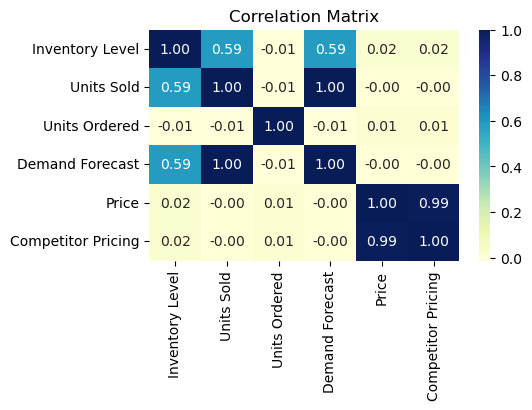

In [174]:
plt.figure(figsize=(5,3))
sns.heatmap(matrix_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

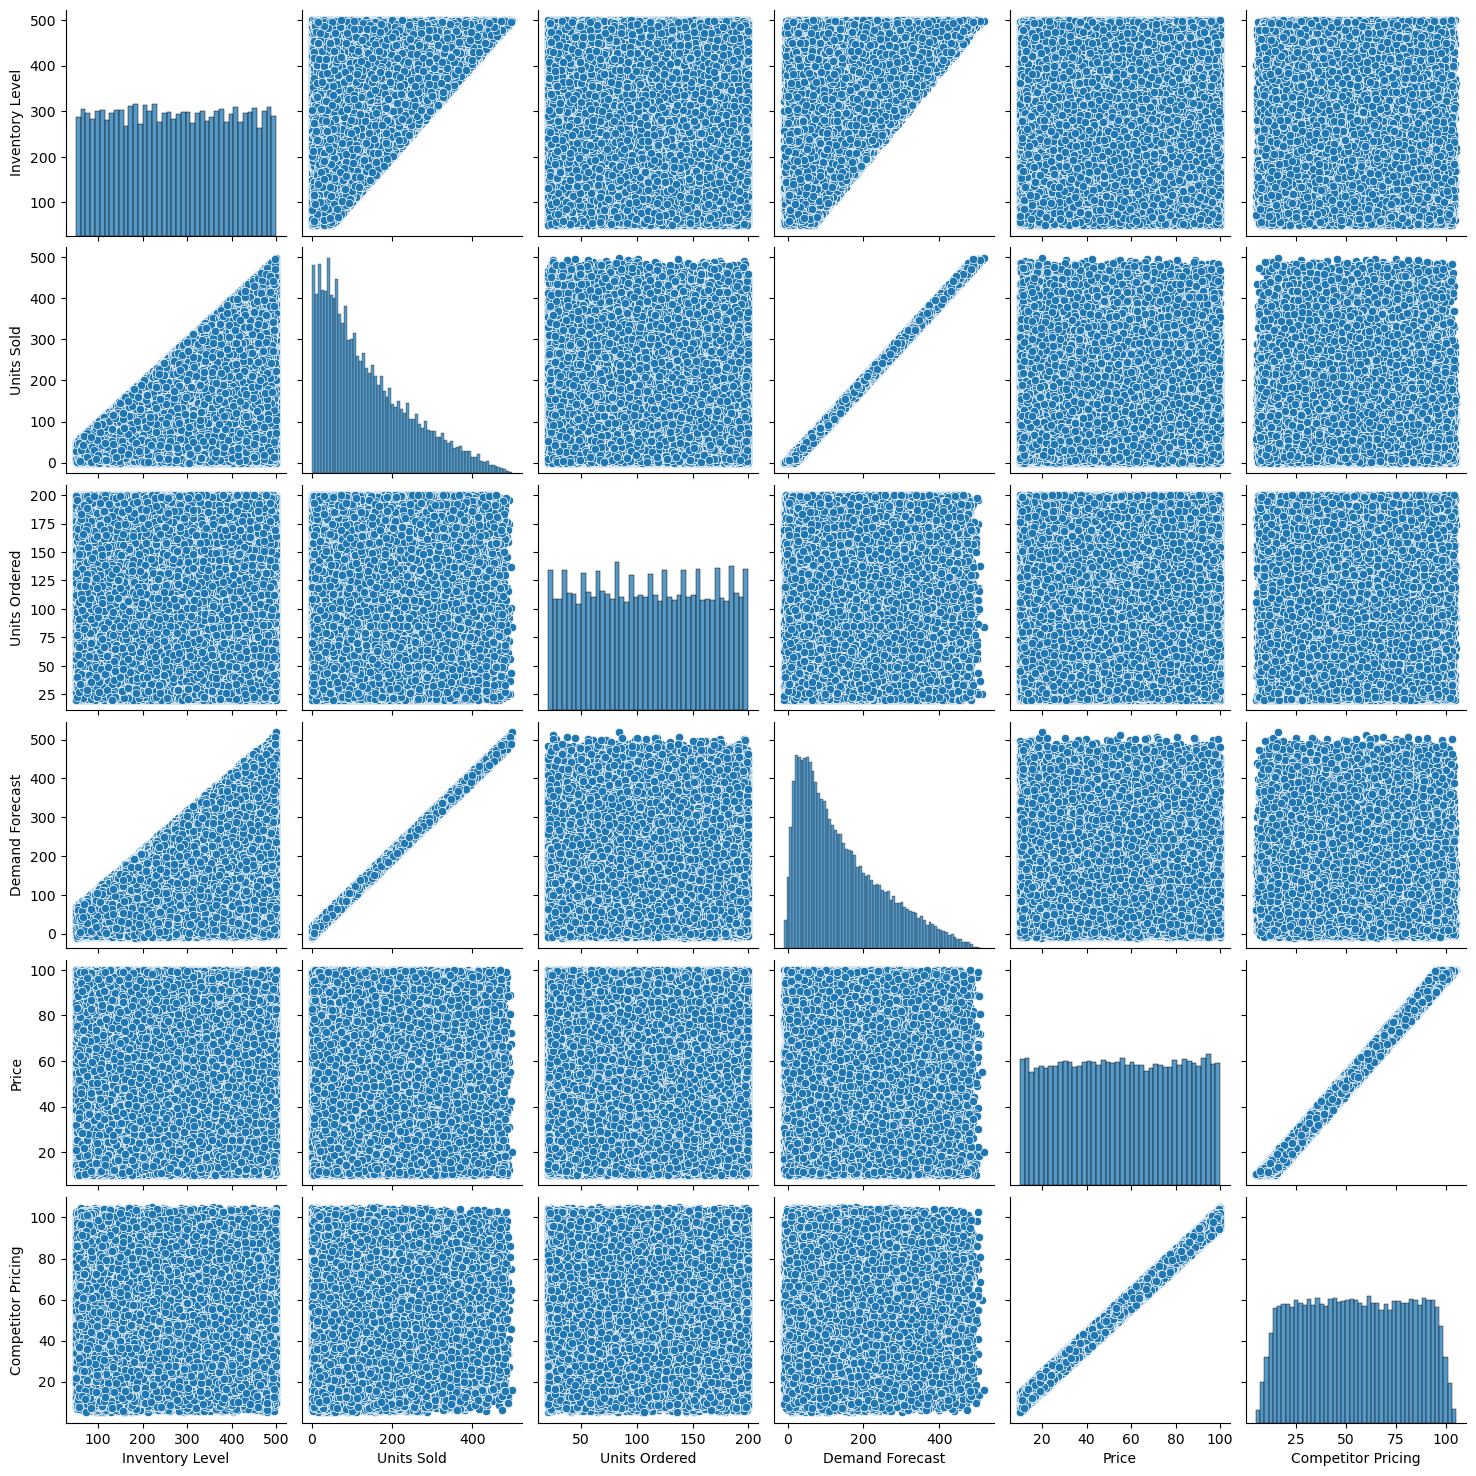

In [175]:
sns.pairplot(retail_store_inventory[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']])
plt.show()

In [176]:
pairs_of_regression_variables = [["Demand Forecast", "Units Sold"], ["Price", "Competitor Pricing"]]

In [177]:
list_qualitative_variable = ["Region", "Seasonality", "Holiday/Promotion", 'Discount', "Weather Condition"]

In [178]:
for item in list_qualitative_variable:
  retail_store_inventory_clothing[item] = retail_store_inventory_clothing[item].astype("category")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1145251732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_store_inventory_clothing[item] = retail_store_inventory_clothing[item].astype("category")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1145251732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_store_inventory_clothing[item] = retail_store_inventory_clothing[item].astype("category")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1145251732.py:2: SettingWithCopyWarning: 
A v

In [179]:
retail_store_inventory_clothing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 7 to 73097
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                14626 non-null  object  
 1   Store ID            14626 non-null  object  
 2   Product ID          14626 non-null  object  
 3   Category            14626 non-null  object  
 4   Region              14626 non-null  category
 5   Inventory Level     14626 non-null  int64   
 6   Units Sold          14626 non-null  int64   
 7   Units Ordered       14626 non-null  int64   
 8   Demand Forecast     14626 non-null  float64 
 9   Price               14626 non-null  float64 
 10  Discount            14626 non-null  category
 11  Weather Condition   14626 non-null  category
 12  Holiday/Promotion   14626 non-null  category
 13  Competitor Pricing  14626 non-null  float64 
 14  Seasonality         14626 non-null  category
dtypes: category(5), float64(3), int64(3), obj

In [180]:
retail_store_inventory_clothing.describe(include=['category'])

,Region,Discount,Weather Condition,Holiday/Promotion,Seasonality
count,14626,14626,14626,14626,14626
unique,4,5,4,2,4
top,East,20,Sunny,0,Winter
freq,3753,2956,3703,7375,3689


# Exploratory Data Analysis (EDA)

## 1. EDA for Categorical features 

### Region

In [181]:
retail_store_inventory_clothing["Region"].value_counts().to_frame()

,count
Region,
East,3753
West,3694
South,3651
North,3528


In [182]:
retail_store_inventory_clothing["Region"].value_counts(normalize=True).to_frame()

,proportion
Region,
East,0.256598
West,0.252564
South,0.249624
North,0.241214


### Seasonality

In [183]:
retail_store_inventory_clothing["Seasonality"].value_counts().to_frame()

,count
Seasonality,
Winter,3689
Spring,3675
Autumn,3636
Summer,3626


In [184]:
retail_store_inventory_clothing["Seasonality"].value_counts(normalize=True).to_frame()

,proportion
Seasonality,
Winter,0.252222
Spring,0.251265
Autumn,0.248598
Summer,0.247915


###  Holiday/Promotion

In [185]:
retail_store_inventory_clothing["Holiday/Promotion"].value_counts().to_frame()

,count
Holiday/Promotion,
0,7375
1,7251


In [186]:
retail_store_inventory_clothing["Holiday/Promotion"].value_counts(normalize=True).to_frame()

,proportion
Holiday/Promotion,
0,0.504239
1,0.495761


### Discount

In [187]:
retail_store_inventory_clothing["Discount"].value_counts().to_frame()

,count
Discount,
20,2956
0,2946
5,2924
15,2921
10,2879


In [188]:
retail_store_inventory_clothing["Discount"].value_counts(normalize=True).to_frame()

,proportion
Discount,
20,0.202106
0,0.201422
5,0.199918
15,0.199713
10,0.196841


### Weather Condition

In [189]:
retail_store_inventory_clothing["Weather Condition"].value_counts().to_frame()

,count
Weather Condition,
Sunny,3703
Rainy,3676
Cloudy,3640
Snowy,3607


In [190]:
retail_store_inventory_clothing["Weather Condition"].value_counts(normalize=True).to_frame()

,proportion
Weather Condition,
Sunny,0.253179
Rainy,0.251333
Cloudy,0.248872
Snowy,0.246616


<Axes: xlabel='Region', ylabel='count'>

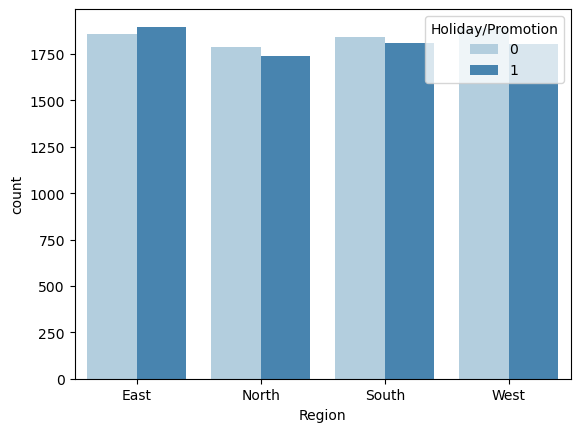

In [191]:
sns.countplot(data=retail_store_inventory_clothing, x="Region", hue="Holiday/Promotion", palette="Blues")

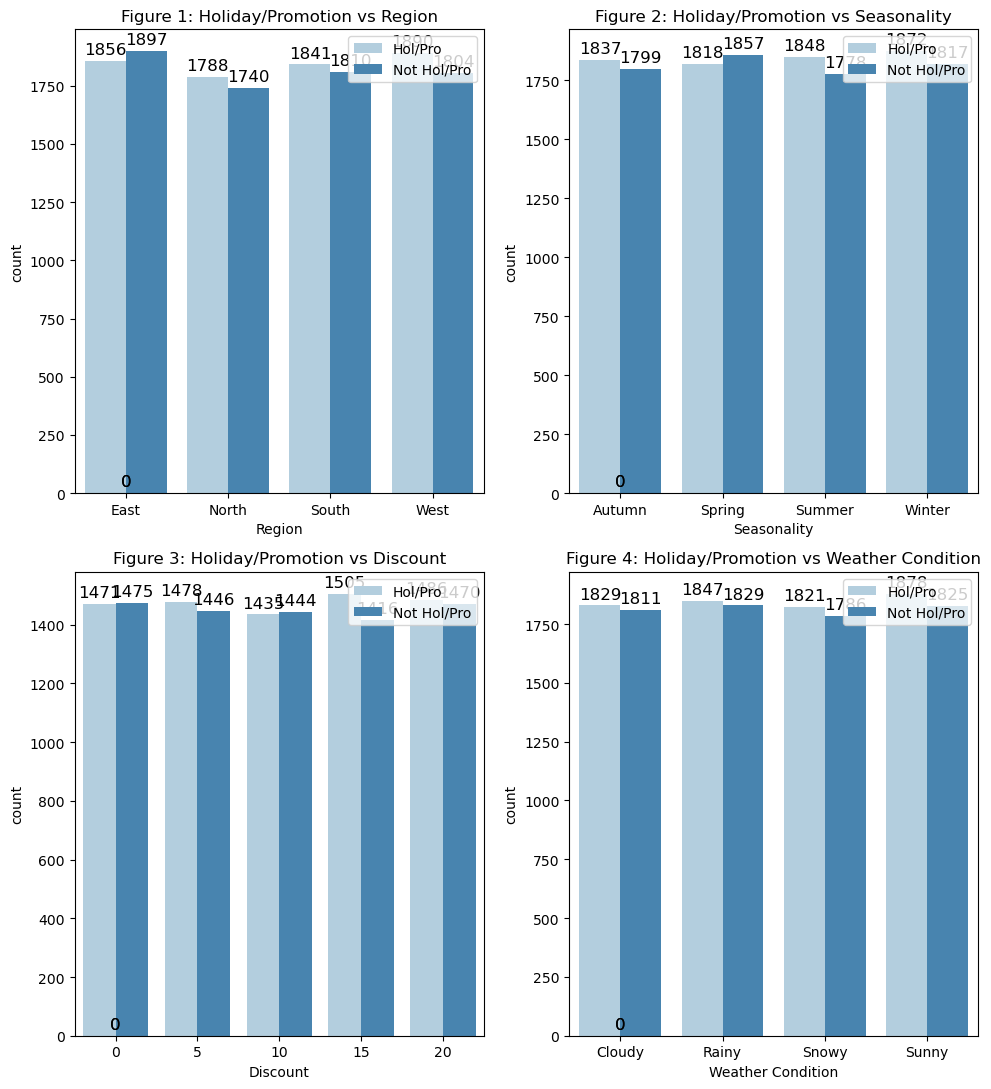

In [192]:
n_rows = 2
n_cols = 2
list_col = ["Region", "Seasonality", 'Discount', "Weather Condition"]
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      sns.countplot(data=retail_store_inventory_clothing, x=list_col[i], hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

## Compare numeric variable according to qualitative variable 

### Price

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\4248274841.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Price"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\4248274841.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Price"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\4248274841.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

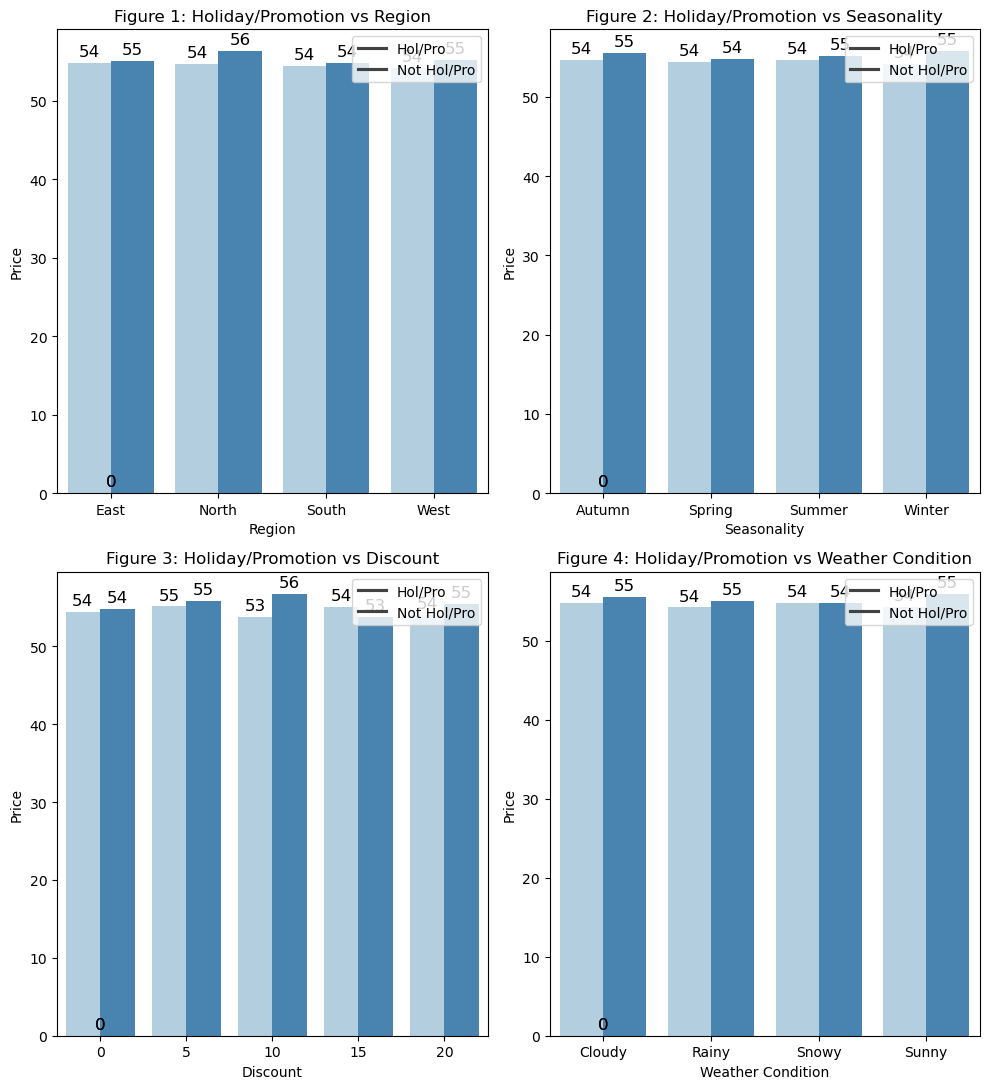

In [193]:
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Price"].mean().reset_index()
      sns.barplot(data=grouped, x=list_col[i], y="Price",hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

### Competitor Pricing

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be 

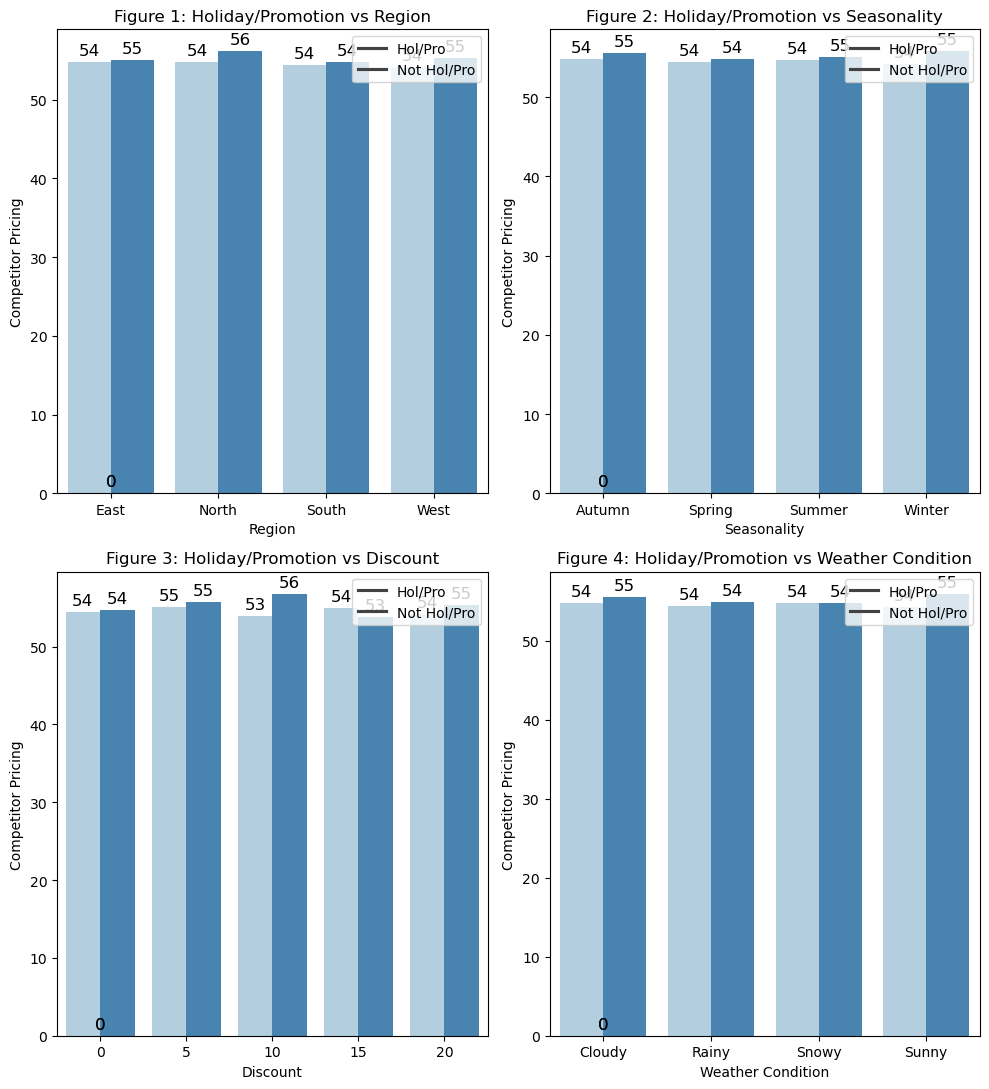

In [194]:
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
      sns.barplot(data=grouped, x=list_col[i], y="Competitor Pricing",hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

### Demand Forecast

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\302623520.py:8: FutureWarning: The default of observed=False is deprecated and will be 

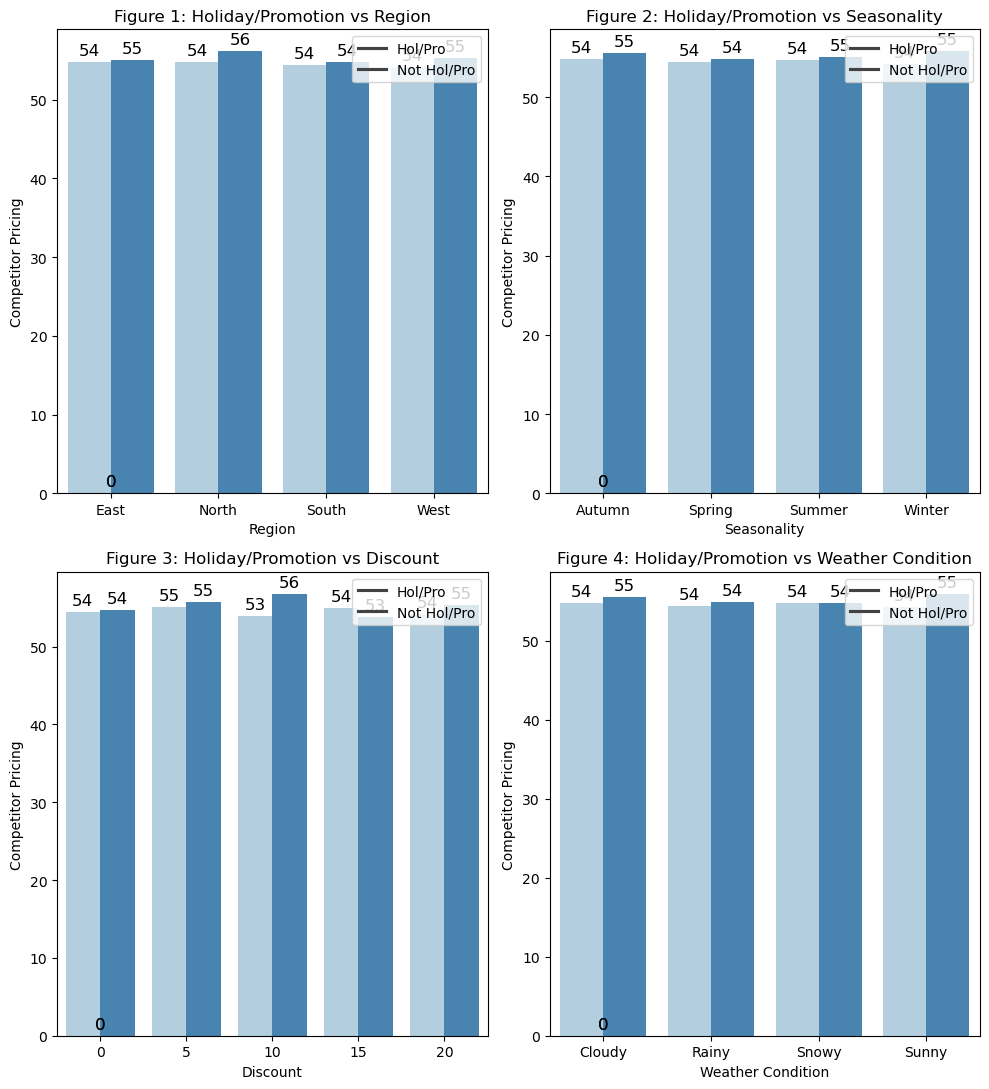

In [195]:
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Competitor Pricing"].mean().reset_index()
      sns.barplot(data=grouped, x=list_col[i], y="Competitor Pricing",hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

### Units Ordered

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1653879861.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Ordered"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1653879861.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Ordered"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\1653879861.py:8: FutureWarning: The default of observed=False is deprecated and will be changed

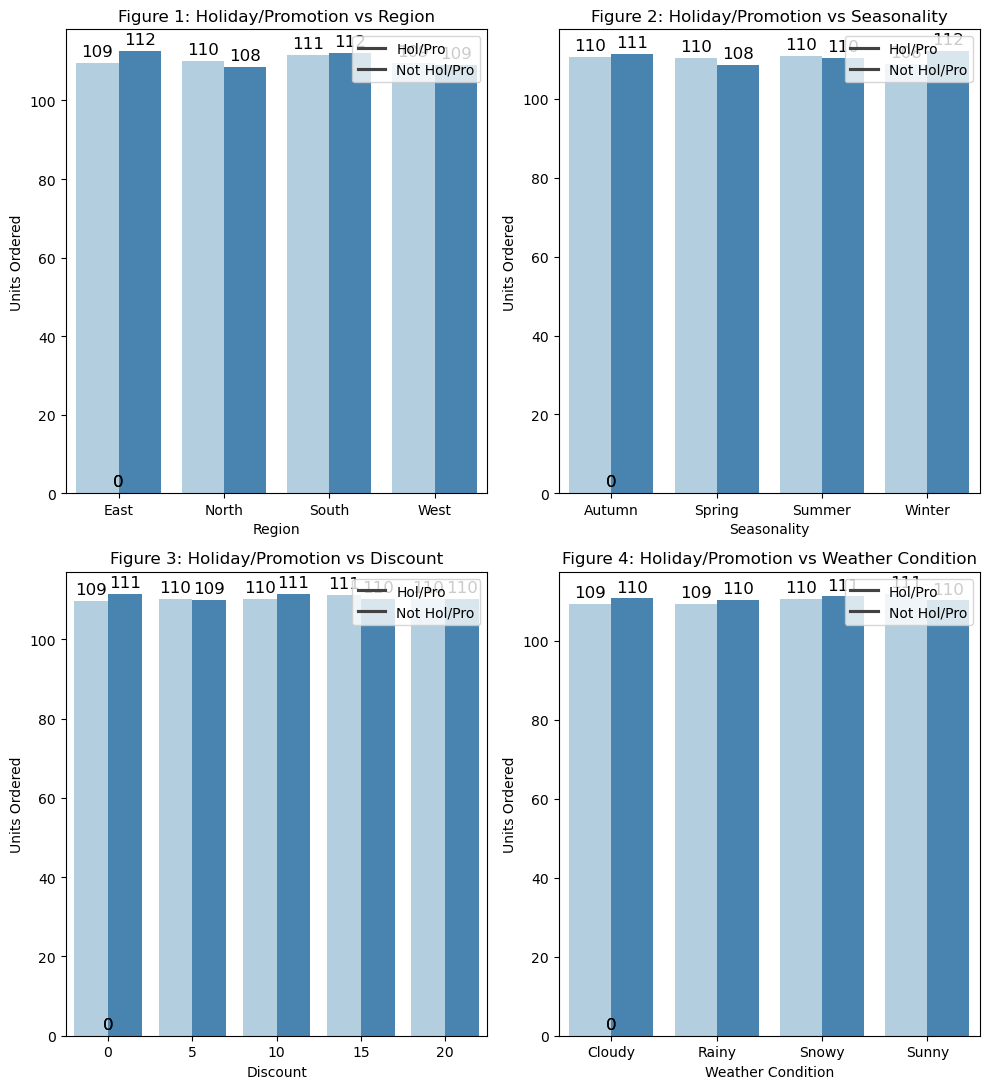

In [196]:
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Ordered"].mean().reset_index()
      sns.barplot(data=grouped, x=list_col[i], y="Units Ordered",hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

### Units Sold

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\2111964304.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Sold"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\2111964304.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Sold"].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9116\2111964304.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

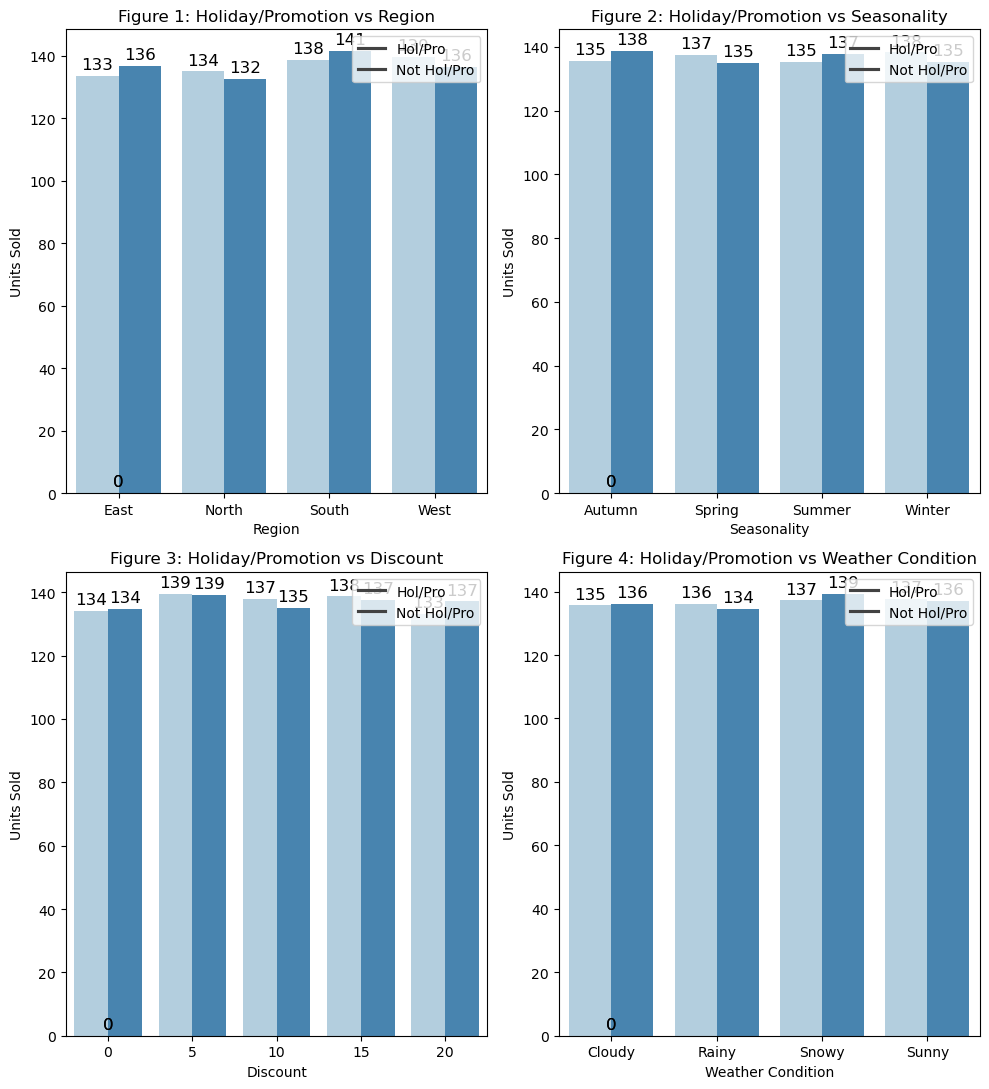

In [197]:
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5.5))
fig.subplots_adjust(hspace=1, wspace=1)
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(list_col) + 1:
      ax_i = ax[r,c]
      grouped = retail_store_inventory_clothing.groupby([list_col[i], "Holiday/Promotion"])["Units Sold"].mean().reset_index()
      sns.barplot(data=grouped, x=list_col[i], y="Units Sold",hue="Holiday/Promotion", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Holiday/Promotion vs {list_col[i]}")
      ax_i.legend(title='', loc="upper right", labels=["Hol/Pro", "Not Hol/Pro"])
      for p in ax_i.patches:
        ax_i.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()

# Analyze according models 

### Linear regression 

In [198]:
pairs_of_regression_variables

[['Demand Forecast', 'Units Sold'], ['Price', 'Competitor Pricing']]

In [199]:
from sklearn.linear_model import LinearRegression

In [200]:
regressor = LinearRegression()

In [213]:
X = retail_store_inventory_clothing["Demand Forecast"].values.reshape(-1,1)
y = retail_store_inventory_clothing["Units Sold"].values.reshape(-1,1)

In [214]:
X

array([[329.73],
       [ 26.75],
       [  6.8 ],
       ...,
       [193.14],
       [ 43.07],
       [ 39.65]])

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [216]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [217]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [218]:
regressor.fit(X_train, y_train)

LinearRegression()

In [219]:
y_pred = regressor.predict(X_test)

In [220]:
y_pred

array([[-4.92859326e-01],
       [ 4.38297706e-01],
       [ 3.95091729e-01],
       ...,
       [-3.83042466e-05],
       [-2.89927672e-01],
       [ 2.36912372e-01]])

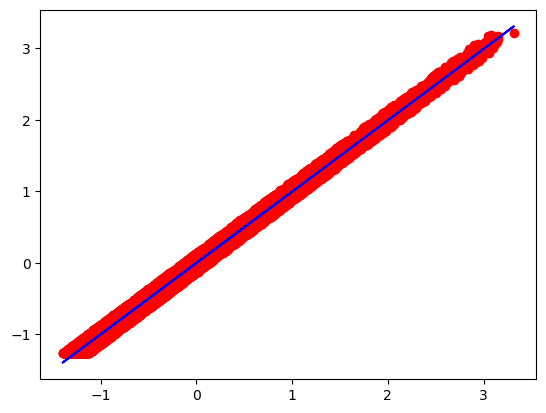

In [221]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

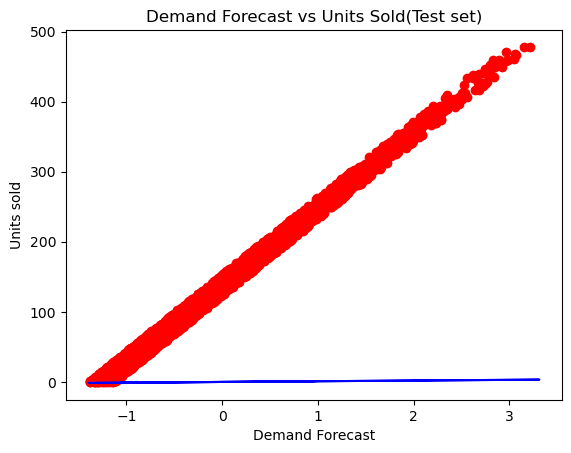

In [223]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Demand Forecast vs Units Sold(Test set)')
plt.xlabel('Demand Forecast')
plt.ylabel('Units sold')
plt.show()